# Statistics

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
def prod(array):
    '''Returns the product of an array'''
    n = 1
    for i in array:
       n *= i
    return n


## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def var_std(array):
    mean = sum(array) / len(array)
    var = sum([(i - mean) **2 for i in array]) / len(array)
    std = var ** 0.5
    return var, std

In [88]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

sale_var, sale_std = var_std(sales)

print('Sales Variance: {}'.format(sale_var))
print('Sales Standard Deviation: {}'.format(sale_std))

Sales Variance: 183761.06122448976
Sales Standard Deviation: 428.67360686714756


In [89]:
#tests

print(np.var(sales))
print(np.std(sales))

183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]
data = {'sales': sales, 'customers': customers}
df = pd.DataFrame(data)

In [91]:
np.cov(df['sales'], df['customers'])

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [92]:
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [93]:
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


In [94]:
_, cust_std = var_std(customers)

print(sale_std, cust_std)

428.67360686714756 15.792015549069118


In [95]:
#corr_coef = np.cov(df['sales'], df['customers']) / (sale_std * cust_std)
corr_coef = (np.cov(df['sales'], df['customers']))[0][1] / (sale_std * cust_std)
corr_coef

1.123306307450706

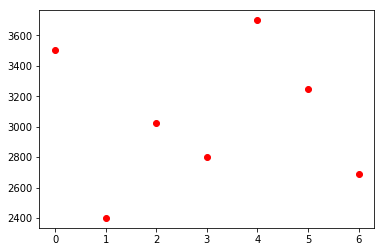

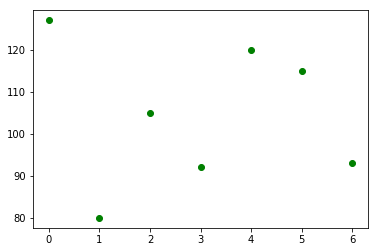

In [96]:
x = [0,1,2,3,4,5,6]
plt.scatter(x=x, y=df['sales'], color='red')
plt.show();

plt.scatter(x=x, y=df['customers'], color='green')
plt.show();

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [97]:
path = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(path)
print(df.shape)
df.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [98]:
df.isna().sum()

Unnamed: 0             0
pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [99]:
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [100]:
columns = ['Unnamed: 0', 'pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'has_cabin_number']
df = df[columns]
df.dropna(inplace=True)
df.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,1


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [101]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Unnamed: 0,142758.852129,284.266312,-53.841414,-1458.534777,26.066613,1.342019,-9410.735123,-95.373542
pclass,284.266312,0.702126,-0.127139,-3.974162,0.053400,0.013505,-24.227788,-0.250062
survived,-53.841414,-0.127139,0.236319,-0.305629,-0.014245,0.034690,6.146023,0.061387
age,-1458.534777,-3.974162,-0.305629,165.385957,-2.550069,-1.451467,114.416613,1.470661
sibsp,26.066613,0.053400,-0.014245,-2.550069,1.085692,0.336944,8.641768,-0.004036
parch,1.342019,0.013505,0.034690,-1.451467,0.336944,0.749654,9.928031,0.013260
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-95.373542,-0.250062,0.061387,1.470661,-0.004036,0.013260,10.976961,0.174803


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Unnamed: 0,142758.852129,284.266312,-53.841414,-1458.534777,26.066613,1.342019,-9410.735123,-95.373542
pclass,284.266312,0.702126,-0.127139,-3.974162,0.053400,0.013505,-24.227788,-0.250062
survived,-53.841414,-0.127139,0.236319,-0.305629,-0.014245,0.034690,6.146023,0.061387
age,-1458.534777,-3.974162,-0.305629,165.385957,-2.550069,-1.451467,114.416613,1.470661
sibsp,26.066613,0.053400,-0.014245,-2.550069,1.085692,0.336944,8.641768,-0.004036
parch,1.342019,0.013505,0.034690,-1.451467,0.336944,0.749654,9.928031,0.013260
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-95.373542,-0.250062,0.061387,1.470661,-0.004036,0.013260,10.976961,0.174803


In [102]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Unnamed: 0,1.000000,0.897876,-0.293134,-0.300169,0.066211,0.004102,-0.481215,-0.603743
pclass,0.897876,1.000000,-0.312122,-0.368798,0.061162,0.018615,-0.558629,-0.713783
survived,-0.293134,-0.312122,1.000000,-0.048887,-0.028122,0.082418,0.244265,0.302031
age,-0.300169,-0.368798,-0.048887,1.000000,-0.190305,-0.130355,0.171892,0.273520
sibsp,0.066211,0.061162,-0.028122,-0.190305,1.000000,0.373485,0.160238,-0.009264
parch,0.004102,0.018615,0.082418,-0.130355,0.373485,1.000000,0.221539,0.036629
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.603743,-0.713783,0.302031,0.273520,-0.009264,0.036629,0.507253,1.000000


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Unnamed: 0,1.000000,0.897876,-0.293134,-0.300169,0.066211,0.004102,-0.481215,-0.603743
pclass,0.897876,1.000000,-0.312122,-0.368798,0.061162,0.018615,-0.558629,-0.713783
survived,-0.293134,-0.312122,1.000000,-0.048887,-0.028122,0.082418,0.244265,0.302031
age,-0.300169,-0.368798,-0.048887,1.000000,-0.190305,-0.130355,0.171892,0.273520
sibsp,0.066211,0.061162,-0.028122,-0.190305,1.000000,0.373485,0.160238,-0.009264
parch,0.004102,0.018615,0.082418,-0.130355,0.373485,1.000000,0.221539,0.036629
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.603743,-0.713783,0.302031,0.273520,-0.009264,0.036629,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-1, 5)

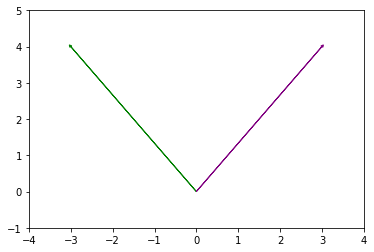

(-1, 5)

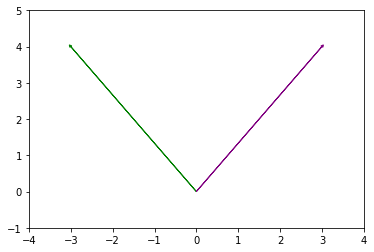

In [103]:
#perpendicular

v1 = [-3, 4]
v2 = [3, 4]


plt.arrow(0, 0, v1[0], v1[1], head_width=0.06, head_length=0.06, color='green')
plt.arrow(0, 0, v2[0], v2[1], head_width=0.06, head_length=0.06, color='purple')
plt.xlim(-4,4)
plt.ylim(-1,5)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
def is_orthogonal(vector_1, vector_2):
    if (prod(vector_1) + prod(vector_2)) == 0:
        print(f'Vector {vector_1} and Vector {vector_2} are orthogonal')
    else:
        print(f'Vector {vector_1} and Vector {vector_2} are NOT orthogonal')

In [105]:
a = [-5, 3, 7]
b = [6, -8, 2]

is_orthogonal(a, b)

Vector [-5, 3, 7] and Vector [6, -8, 2] are NOT orthogonal
Vector [-5, 3, 7] and Vector [6, -8, 2] are NOT orthogonal


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2, -15, 6, 20]
def n0rm(array):
    return sum([(i **2) for i in array]) ** 0.5

def dot(vector_1, vector_2):
    if len(vector_1) != len(vector_2):
        print('Vectors must be the same size')
    else:
        return sum([(vector_1[i] * vector_2[i]) for i in range(len(vector_1))])


In [107]:
#Norm squared 
n0rm(c) **2

665.0

665.0

In [108]:
#Dot
dot(c, c)

665

665

In [109]:
#self times self.T
dfc = pd.DataFrame(c)
cc = np.array((c * dfc.T).T)
cTc = sum(cc)
cTc[0]

665

665

In [110]:
dfc = np.array(dfc)
np.matmul(c, dfc)[0]

665

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12  \end{bmatrix} = 7\begin{bmatrix} 1\\0  \end{bmatrix} + 12\begin{bmatrix} 0\\1 \end{bmatrix} = 7\hat{i} + 12 \hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix}2\\11\\-8 \end{bmatrix}=2\begin{bmatrix}1\\0\\0\end{bmatrix}+11\begin{bmatrix}0\\1\\0\end{bmatrix}-8\begin{bmatrix}0\\0\\1\end{bmatrix}=
2\hat{i}+11\hat{j}-8\hat{k}
\end{align}



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}
\begin{align}
f = 19.131126469708992 \begin{bmatrix}0.20908335\\0.62725005\\0.57497921\\0.47043754\\0.10454167 \end{bmatrix}
\end{align}

In [111]:
f = np.array([4, 12, 11, 9, 2])
print(n0rm(f))

fhat = f / n0rm(f)
fhat

19.131126469708992


array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

19.131126469708992


array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

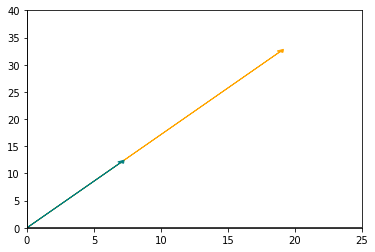

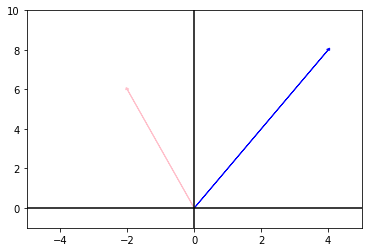

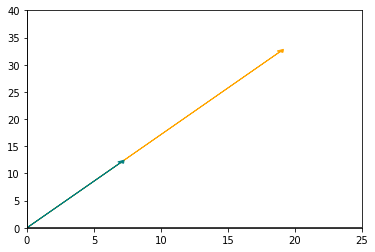

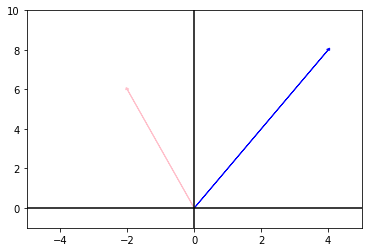

In [112]:
ld_1 = np.array([7, 12])
ld_2 = ld_1 * 2.7

plt.xlim(0,25)
plt.ylim(0,40)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.arrow(0, 0, ld_2[0], ld_2[1], head_width=0.5, head_length=0.5, color='orange')
plt.arrow(0, 0, ld_1[0], ld_1[1], head_width=0.5, head_length=0.5, color='teal')
plt.show();

li_1 = [4, 8]
li_2 = [-2, 6]

plt.xlim(-5,5)
plt.ylim(-1,10)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.arrow(0, 0, li_1[0], li_1[1], head_width=0.1, head_length=0.1, color='blue')
plt.arrow(0, 0, li_2[0], li_2[1], head_width=0.1, head_length=0.1, color='pink')
plt.show();

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

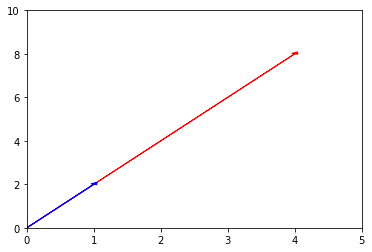

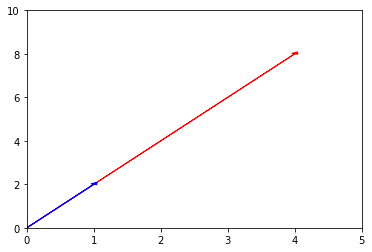

In [113]:
g = np.array([1, 2])
h = np.array([4, 8])

plt.xlim(0,5)
plt.ylim(0,10)

plt.arrow(0, 0, h[0], h[1], head_width=0.1, head_length=0.1, color='red')
plt.arrow(0, 0, g[0], g[1], head_width=0.1, head_length=0.1, color='blue')

In [0]:
### These vectors span only 1 Dimensional space or R

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

(-10, 10)

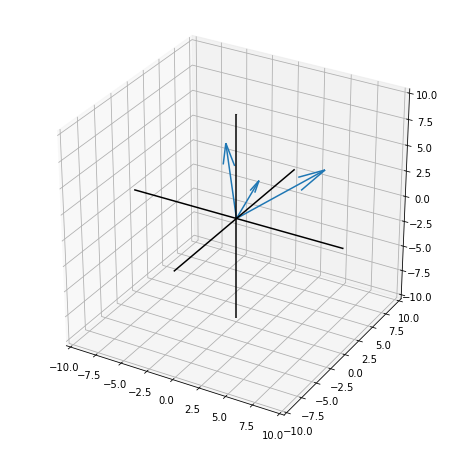

(-10, 10)

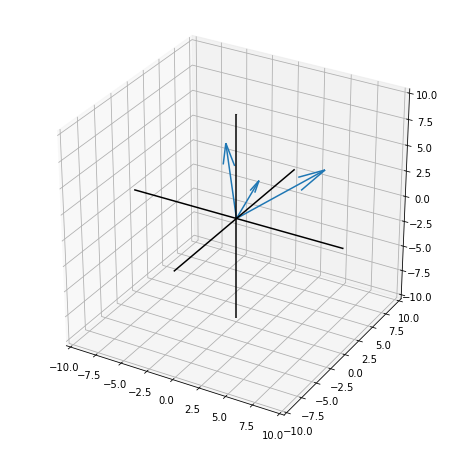

In [115]:
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, l[0], l[1], l[2])
ax.quiver(0, 0, 0, m[0], m[1], m[2])
ax.quiver(0, 0, 0, n[0], n[1], n[2])

ax.quiver(-10, 0, 0, 20, 0, 0, color='k', arrow_length_ratio=0.001)
ax.quiver(0, -10, 0, 0, 20, 0, color='k', arrow_length_ratio=0.001)
ax.quiver(0, 0, -10, 0, 0, 20, color='k', arrow_length_ratio=0.001)

ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)

In [0]:
# This vector spans 3 Dimensions or R^3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

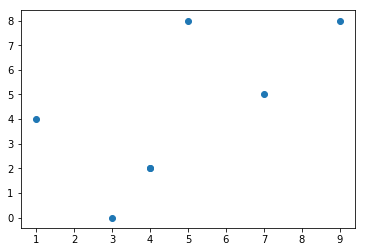

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()